# tmp

In [3]:
#TODO MAD CW_SSIM NLPD VSI FSIM
#from piq import IS, FID, GS, KID, MSID, PR
from piq import HaarPSILoss,VIFLoss, DSSLoss,dss, multi_scale_ssim, multi_scale_gmsd,vif, vif_p,MDSILoss, GMSDLoss,VSILoss,SRSIMLoss
from IQA_pytorch import GMSD, VIF, VIFs, MS_SSIM, SSIM
from piq import DISTS as piq_DISTS
from piq import LPIPS as piq_LPIPS
to_train = True

self.GMSD_loss_1 = GMSD()
self.iqa_vifs_loss = VIFs()    
self.iqa_vif_loss = VIF()
self.piq_vif_Loss = VIFLoss()
self.piq_vif_p_loss = vif_p
self.dss_loss_1 = DSSLoss()
self.dss_loss_2 = dss
self.msssim_1_loss = multi_scale_ssim
self.haarpsi_loss = HaarPSILoss()
self.msssim_2 = MS_SSIM()
self.ms_gmsd_loss = multi_scale_gmsd
self.SRSIM_loss = SRSIMLoss()
self.VSI_loss = VSILoss()
self.GMSD_loss_2 = GMSDLoss()
self.MDSI_met = MDSILoss()
self.ssim_loss = SSIM()
self.DISTS_loss_2 = piq_DISTS()
self.LPIPS_loss_2 = piq_LPIPS()


In [8]:
X_sample = X_sample.requires_grad_().to(device)
lst_direction = []
met_lst = ["PieAPP","SSIM", "DISTS","LPIPS", "GMSD","GMSD1","VIFs","VIF","VIFLoss","VIFp","DSS","DSS1","MS-SSIM","HaarPSI","MS-SSIM","MS-GMSD","SRSIM","VSI","MDSI","DISTS1","LPIPS1"]
for tar_met in met_lst:
    cfg["general"]["loss_calc"] = Custom_enh_Loss(target_lst = [tar_met])
    cfg["general"]["loss_calc"].eval()
    cfg["general"]["loss_calc"] = loss_calc.requires_grad_(True).to(device)
    
    ls = cfg["general"]["loss_calc"]({"x_hat" :X_sample}, X_sample)
    ls1 = list(ls.items())[2][1]
    
    ls = cfg["general"]["loss_calc"]({"x_hat" :X_sample - X_sample}, X_sample)
    ls2 = list(ls.items())[2][1]
    lst_direction.append(ls1.item() > ls2.item())
    print(list(zip(met_lst, lst_direction)))
    print(ls1.item() == ls2.item())

[('PieAPP', False)]
False
[('PieAPP', False), ('SSIM', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False), ('VIFs', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False), ('VIFs', False), ('VIF', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False), ('VIFs', False), ('VIF', False), ('VIFLoss', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False), ('VIFs', False), ('VIF', Fal

In [30]:
device = "cuda:0"
X_sample = X_sample.to(device).requires_grad_()

loss = LPIPS()
loss = loss.requires_grad_(True)
loss.requires_grad = True
loss.eval()
X_sample = X_sample.to(device)
loss = loss.to(device)
#with torch.enable_grad():
ls = loss(X_sample, X_sample)
ls

C:\ProgramData\Anaconda3\envs\backup\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)

In [23]:
torch.rfft = torch.fft.rfft
cfg["general"]["loss_calc"] = Custom_enh_Loss(target_lst = ["LPIPS"])#PieAPP DISTS LPIPS
X_sample = X_sample.to(device)
cfg["general"]["loss_calc"]({"x_hat" : X_sample}, X_sample)

{'mse_loss': tensor(0., device='cuda:0'),
 'PSNR': tensor(inf, device='cuda:0'),
 'LPIPS': tensor(0., device='cuda:0'),
 'loss': tensor(0., device='cuda:0')}

In [20]:
codec_compressor = codec_outer_compress("R:/home_dir/", " -c:v mjpeg -q:v 1 ")
codec_compressor()
print(codec_compressor.get_bitrate())
#logs_plot_cur['bitrate'] = codec_compressor.get_bitrate()
#logs_plot_cur

102.283965


In [9]:
codec_compressor.get_bitrate()

102.366671

In [ ]:
"model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt"
"model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt"
"model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt"

In [3]:
get_met_names(directory='./models_enhancement_FR/',key= lambda x: "model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt" in x or "model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt" in x or "model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt" in x, force_names= [['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt'], ["DISTS1", "LPIPS1", "LPIPS"], ['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt']])[0]

[['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt'],
 ['DISTS1', 'LPIPS1', 'LPIPS'],
 ['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt']]

In [ ]:
 #a0= model_dirs_full, model_dirs_full, model_names = get_met_names(key= lambda x: "2000mse" in x and 
        #                                                                     "cheng2020_attn_quality2" in x and 
        #                                                                     'quality5' not in x and (('fixed_direction' in x) or 
        #                                                                                              "MDTVSFA_2000m" in x))
        
        #a0 = [a0[0][1:], a0[1][1:], a0[2][1:]]
        #a1 = get_met_names(key= lambda x: "model_vimeo11k_Linearity_2000mse_enhance_no_codec_fixed_direction.ckpt" in x)
        #a2 = get_met_names(directory='./models_enhancement/0403/', key= lambda x: "" in x)
        #model_dirs_full, model_target_met_names, model_names = [a0[0] + a1[0] + a2[0], a0[1] + a1[1] + a2[1],a0[2] +  a1[2] + a2[2]]
        #model_dirs_full, model_target_met_names, model_names = model_dirs_full, model_target_met_names, model_names

In [ ]:
"""force_names= [['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt'], ["DISTS1", "LPIPS1", "LPIPS"], ['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt']]"""

# part 2

In [1]:
import yaml
from types import SimpleNamespace
cfg_dir = "tmp.yaml"
with open(cfg_dir) as fh:
    cfg = yaml.load(fh, Loader=yaml.FullLoader)
    cfg["general"]["cfg_dir"] = cfg_dir

cfg["general"]["break_flag"] = True
home_dir = "R:/home_dir/"
dst_dir = "P:/7videos/"
#exec(open('Current_model.py').read())
%run -i Current_model_lib
%run -i Train_current_model
home_dir = "R:/home_dir/"
dst_dir = "P:/7videos/"

%run -i Codecs_validation
import wandb


  0%|          | 0/12 [00:00<?, ?it/s]

In [2]:

#device_met = "cuda:0"
#device_enh = "cuda:0"
#device_sub = "cpu"
#num_frames = 6
#net_codec = cheng2020_attn(quality=3, pretrained=True).to(device_met).requires_grad_(True)

In [3]:
from compressai.zoo import cheng2020_attn
codecs_all_neural = [cheng2020_attn(quality=1, pretrained=True,device = cfg["run"]["device_sub"]),cheng2020_attn(quality=3, pretrained=True,device = cfg["run"]["device_sub"]), cheng2020_attn(quality=4, pretrained=True,device = cfg["run"]["device_sub"]), cheng2020_attn(quality=6, pretrained=True,device = cfg["run"]["device_sub"]),]
codecs_all_motion = [" -c:v mjpeg -q:v 1 "," -c:v mjpeg -q:v 2 ", " -c:v mjpeg -q:v 3 ", " -c:v mjpeg -q:v 5 ", " -c:v mjpeg -q:v 7 ", " -c:v mjpeg -q:v 9 "]
codecs_all_test = [" -vcodec libx264   -preset:v medium -b:v 100k ",
                   " -vcodec libx264   -preset:v medium -b:v 3M "]
codecs_all_h264 = [" -vcodec libx264   -preset:v medium -b:v 100k ",
                   " -vcodec libx264   -preset:v medium -b:v 200k ",
                   " -vcodec libx264   -preset:v medium -b:v 300k ",
                   " -vcodec libx264   -preset:v medium -b:v 500k ",
                   " -vcodec libx264   -preset:v medium -b:v 1M ",
                   " -vcodec libx264   -preset:v medium -b:v 2M ",
                   " -vcodec libx264   -preset:v medium -b:v 3M ",
                   " -vcodec libx264   -preset:v medium -b:v 5M ",
                   " -vcodec libx264   -preset:v medium -b:v 7M "
                   " -vcodec libx264   -preset:v medium -b:v 9M ",
                   " -vcodec libx264   -preset:v medium -b:v 12M "]
codecs_all_neural_2 = [cheng2020_attn(quality=3, pretrained=True), cheng2020_attn(quality=6, pretrained=True)]
codecs_all_motion_1 = [" -c:v mjpeg -q:v 3 "]
codecs_all_h264_3 = [ " -vcodec libx264   -preset:v medium -b:v 3M ",]
force_names = ["model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt","model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt",
"model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt"]
force_names = ['./models_enhancement_FR/' + i for i in force_names], ["DISTS", "LPIPS", "LPIPS1"], force_names
force_names

(['./models_enhancement_FR/model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt'],
 ['DISTS', 'LPIPS', 'LPIPS1'],
 ['model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt',
  'model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt',
  'model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt'])

In [4]:
cfg

{'general': {'datalen_test': 2,
  'datalen_train': 64,
  'batch_size_train': 8,
  'batch_size_test': 1,
  'name': 'vimeo11k_tmp',
  'codec': 'cheng2020_attn_quality2',
  'k_lst': [1],
  'met_names': ['DISTS'],
  'max_epoch': 12,
  'patch_sz': 256,
  'enhance': True,
  'enhance_net': 'Resnet18Unet',
  'quality': 3,
  'cfg_dir': 'tmp.yaml',
  'logs_dir': 'logs/',
  'dataset_type': 'img',
  'home_dir': 'R:/home_dir/',
  'dataset_dir': 'P:/vimeo_triplet/sequences/',
  'center_crop': False,
  'minimal_batch_sz"': 0,
  'project_name': 'White box tuning',
  'break_flag': True,
  'save_netcodec': False,
  'save_net_enhance': True,
  'optimize_image': False,
  'use_wandb': False,
  'optimizer': 'SGD',
  'to_crop': True,
  'optimizer_opt': {'lr': 0.001},
  'minimal_batch_sz': 2,
  'num_frames': 64},
 'run': {'device': 'cpu',
  'device_met': 'cuda:0',
  'device_enh': 'cuda:0',
  'device_sub': 'cpu',
  'net_enhance': ResNetUNet(
    (base_model): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7

In [5]:
#FR
try:
    os.mkdir(cfg['general']['home_dir'])
except Exception:
    pass
for codecs_all, codec_type in zip([codecs_all_neural, codecs_all_motion, codecs_all_h264 ], ["neural", "motion", "h264"]):
    for to_crop in [True, False]:
        for Identity_flag in [False, True]:
            try:
                Log_1 = []
                cfg["general"]["to_crop"] = to_crop
                cfg["general"]["codecs"] = codecs_all
                cfg["general"]["codec_type"] = codec_type
                cfg["general"]['enhance'] = Identity_flag
                model_dirs_full, model_target_met_names, model_names = force_names
                net_enhances = load_models(model_dirs_full)
                model_target_met_names = [i if i != "PAC2PIC" else "PAC2PIQ" for i in model_target_met_names]
                if Identity_flag:
                    model_target_met_names = np.unique(model_target_met_names)
                wandb.init(project="Whitebox_strong_metrics_attacks", entity="havent_invented", name="RD_curves_all_met_08_04" + ("Without Preprocessing" if Identity_flag else "With Preprocessing"),
                           tags = {"RD curves", ("Without Preprocessing" if Identity_flag else "With Preprocessing")}, save_code = True)  
                wandb.config.update({'general' : cfg['general']})
                for idxf, file in tqdm(enumerate(os.listdir(dst_dir))):
                    if idxf != 0:
                        continue 
                    Log_2 = []
                    for model,met_name,fil_name_1 in tqdm(zip(net_enhances, model_target_met_names, model_dirs_full)):
                        if met_name == "VSFA":
                            batch_sz = 2
                        else:
                            batch_sz = 1#2
                        if met_name == "Linearity":
                            deivce_main = "cuda:0"
                        else:
                            deivce_main = "cuda:0"
                        torch.cuda.empty_cache()
                        with torch.no_grad():
                            try:
                                f_name = met_name + " " +  file + (" without" if Identity_flag else " with") + " preprocessing" 
                                print(met_name, fil_name_1)
                                try:
                                    del cfg["general"]["loss_calc"]
                                except Exception:
                                    pass
                                cfg["general"]["loss_calc"] = Custom_enh_Loss(target_lst=['mse', met_name], to_train = False, crop_NIMA = False)
                                cfg["general"]["loss_calc"] = cfg["general"]["loss_calc"].to('cpu')
                                ful_name = dst_dir + file
                                with torch.no_grad():
                                    Log_3 = models_codecs_dataset_outer([enhance_Identity if Identity_flag else model],cfg, codecs = codecs_all,
                                                    vid_full_dir = ful_name)
                                table = wandb.Table(columns= list(Log_3[0].keys()), data = [list(Log_3[0].values())])
                                wandb.log({f_name: table}) 
                                print(Log_3)
                                Log_2.append(Log_3)
                            except Exception as exc:
                                raise
                                wandb.alert(title=str(exc), text=str(exc) + " in " + f_name, level = wandb.AlertLevel.ERROR)
                                print("Exception in " + met_name)
                                
                    Log_1.append(Log_2)
                    if 1:
                        np.save("./Logs_rd_curves/DISTSLPIPSLPIPS1" + ("crop" if to_crop else "FullHD") + codec_type + ("_Identity" if Identity_flag else "") + ".npy", Log_1)
                    
                wandb.finish()
                print(Log_1)
            except Exception as exc:
                raise
                wandb.alert(title=str(exc), text=str(exc) + " in " + f_name, level = wandb.AlertLevel.ERROR)

Problem at: <ipython-input-5-257f87163a02> 20 <module>


KeyboardInterrupt: 

In [6]:
cfg["run"]["tmp"][0].shape, cfg["run"]["tmp"][1].shape, cfg["run"]["tmp"][2].shape
cfg["run"]["tmp"] = X_enhance, X_out['x_hat'], Y

(torch.Size([1, 3, 1080, 1920]),
 torch.Size([1, 3, 1088, 1920]),
 torch.Size([1, 3, 1080, 1920]))

In [47]:
loss_calc

Custom_enh_Loss(
  (rdLoss): RateDistortionLoss(
    (mse): MSELoss()
  )
  (LPIPS_loss_2): LPIPS(
    (model): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), str

In [6]:
32

32

In [14]:
Log_1

[[[{'mse': [0.00022671149],
    'bpp_loss': [0.021601094],
    'loss_classic': [0.16902025],
    'PSNR': [36.4852],
    'DISTS': [0.021231644],
    'loss': [42.463512],
    'bitrate': [2.59339]}]],
 [[{'mse': [0.00056005386],
    'bpp_loss': [0.021601094],
    'loss_classic': [0.38577613],
    'PSNR': [33.45553],
    'DISTS': [0.06671855],
    'loss': [133.43765],
    'bitrate': [4.289943]}]],
 [[{'mse': [0.00018650865],
    'bpp_loss': [0.021601094],
    'loss_classic': [0.14287835],
    'PSNR': [37.843365],
    'DISTS': [0.016965995],
    'loss': [33.932175],
    'bitrate': [3.214578]}]],
 [[{'mse': [0.00077158597],
    'bpp_loss': [0.021601094],
    'loss_classic': [0.5233249],
    'PSNR': [31.148333],
    'DISTS': [0.026970215],
    'loss': [53.941204],
    'bitrate': [2.544165]}]],
 [[{'mse': [0.006902557],
    'bpp_loss': [0.021601094],
    'loss_classic': [4.5099883],
    'PSNR': [22.81675],
    'DISTS': [0.08938284],
    'loss': [178.77258],
    'bitrate': [4.244687]}]],
 [[{'m

In [15]:
loss

{'mse': tensor(0.1081, device='cuda:0', grad_fn=<MseLossBackward>),
 'bpp_loss': tensor(0.0831, device='cuda:0', grad_fn=<AddBackward0>),
 'loss_classic': tensor(70.3996, device='cuda:0', grad_fn=<AddBackward0>),
 'PSNR': tensor(9.6602, device='cuda:0', grad_fn=<MulBackward0>),
 'DISTS': tensor(0.7139, device='cuda:0', grad_fn=<MeanBackward0>),
 'loss': tensor(0.7139, device='cuda:0', grad_fn=<AddBackward0>)}

In [11]:
f_name

NameError: name 'f_name' is not defined

In [15]:
Log_31 = models_codecs_dataset_outer([enhance_Identity if Identity_flag else model],codecs = codecs_all,
                                                    vid_full_dir = ful_name, to_crop = to_crop, loss_f = loss_calc)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [20]:
loss_calc.target_lst

['mse', 'LPIPS1']

In [16]:
Log_31

[{'mse': [0.000385212, 0.00015833332],
  'bpp_loss': [0.19677877, 0.5216371],
  'loss_classic': [0.44726285, 0.6245934],
  'PSNR': [34.14646, 38.007214],
  'loss': [0.000385212, 0.00015833332]}]

In [14]:
Log_3

[{'mse': [0.00038541656, 0.0001582719],
  'bpp_loss': [0.19688559, 0.5212835],
  'loss_classic': [0.44750267, 0.62419975],
  'PSNR': [34.14402, 38.008904],
  'loss': [0.00038541656, 0.0001582719]}]

In [13]:
Log_3

[{'mse': [0.00038541656, 0.0001582719],
  'bpp_loss': [0.19688559, 0.5212835],
  'loss_classic': [0.44750267, 0.62419975],
  'PSNR': [34.14402, 38.008904],
  'loss': [0.00038541656, 0.0001582719]}]

In [8]:
Log_3_without = [{'mse': [0.004138566,
   0.0029182995,
   0.0021391548,
   0.0014130209,
   0.0009266126,
   0.0008927816,
   0.000996243,
   0.0010248113,
   0.0009271322,
   0.00088661886],
  'bpp_loss': [0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094],
  'loss_classic': [2.7127037,
   1.9192253,
   1.4125866,
   0.94041795,
   0.6241309,
   0.6021323,
   0.669408,
   0.6879847,
   0.6244688,
   0.59812504],
  'PSNR': [23.87324,
   25.398468,
   26.741173,
   28.531967,
   30.360533,
   30.529217,
   30.088953,
   29.97151,
   30.367912,
   30.550694],
  'DISTS1': [0.25121826,
   0.20849338,
   0.16705196,
   0.11747103,
   0.07635565,
   0.063581474,
   0.07246511,
   0.078163534,
   0.07597885,
   0.072255895],
  'loss': [502.4406,
   416.98965,
   334.10605,
   234.94348,
   152.71222,
   127.16383,
   144.93123,
   156.3281,
   151.95862,
   144.51268],
  'bitrate': [0.097881,
   0.170265,
   0.260425,
   0.436878,
   0.832237,
   1.796109,
   3.475012,
   8.211812,
   17.358653,
   23.61405]}]
Log_3_with = [{'mse': [0.003761526,
   0.0022537024,
   0.0015512533,
   0.00091297226,
   0.00046287983,
   0.0002791155,
   0.00022671149,
   0.00019999941,
   0.00018672063,
   0.00017199243],
  'bpp_loss': [0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094],
  'loss_classic': [2.4675333,
   1.4870713,
   1.0303035,
   0.6152613,
   0.32258868,
   0.20309597,
   0.16902025,
   0.15165071,
   0.14301617,
   0.13343918],
  'PSNR': [24.301882,
   26.550669,
   28.171638,
   30.460445,
   33.400444,
   35.58738,
   36.4852,
   37.067566,
   37.52347,
   37.957916],
  'DISTS1': [0.24984428,
   0.19108722,
   0.15613475,
   0.106379926,
   0.06855124,
   0.046516858,
   0.038198758,
   0.027051479,
   0.021883175,
   0.020024614],
  'loss': [499.69232,
   382.1767,
   312.27106,
   212.76077,
   137.10294,
   93.034,
   76.39774,
   54.103157,
   43.766537,
   40.0494],
  'bitrate': [0.100881,
   0.172306,
   0.263106,
   0.429271,
   0.825821,
   1.681812,
   2.59339,
   4.593584,
   9.852437,
   14.188521]}]

In [6]:
Log_3#Without preprocessing

[{'mse': [0.004138566,
   0.0029182995,
   0.0021391548,
   0.0014130209,
   0.0009266126,
   0.0008927816,
   0.000996243,
   0.0010248113,
   0.0009271322,
   0.00088661886],
  'bpp_loss': [0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094,
   0.021601094],
  'loss_classic': [2.7127037,
   1.9192253,
   1.4125866,
   0.94041795,
   0.6241309,
   0.6021323,
   0.669408,
   0.6879847,
   0.6244688,
   0.59812504],
  'PSNR': [23.87324,
   25.398468,
   26.741173,
   28.531967,
   30.360533,
   30.529217,
   30.088953,
   29.97151,
   30.367912,
   30.550694],
  'DISTS1': [0.25121826,
   0.20849338,
   0.16705196,
   0.11747103,
   0.07635565,
   0.063581474,
   0.07246511,
   0.078163534,
   0.07597885,
   0.072255895],
  'loss': [502.4406,
   416.98965,
   334.10605,
   234.94348,
   152.71222,
   127.16383,
   144.93123,
   156.3281,
   151.95862,
   144.51268],
  'bitrate': [0.097881,
   0.17026

NameError: name 'Log_3_with' is not defined

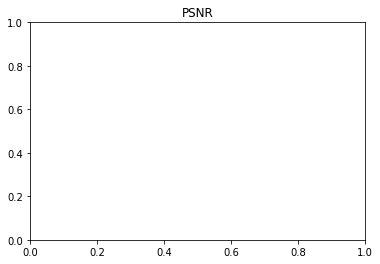

In [20]:
plt.figure()
plt.title("PSNR")
plt.plot(Log_3_with[0]['bitrate'], Log_3_with[0]['PSNR'], label = "withouth preprocessing")
plt.scatter(Log_3_with[0]['bitrate'], Log_3_with[0]['PSNR'])
plt.plot(Log_3_without[0]['bitrate'], Log_3_without[0]['PSNR'], label = "with preprocessing")
plt.scatter(Log_3_without[0]['bitrate'], Log_3_without[0]['PSNR'])
plt.legend()
plt.figure()
plt.title("DISTS")
plt.plot(Log_3_with[0]['bitrate'], Log_3_with[0]['DISTS1'], label = "without preprocessing")
plt.scatter(Log_3_with[0]['bitrate'], Log_3_with[0]['DISTS1'])
plt.plot(Log_3_without[0]['bitrate'], Log_3_without[0]['DISTS1'], label = "with preprocessing")
plt.scatter(Log_3_without[0]['bitrate'], Log_3_without[0]['DISTS1'])
plt.legend()

In [40]:
Log_wihout = np.load("./Logs_rd_curves/AllcodecsVidFullHDmotion_Identity.npy", allow_pickle= True)[0][0].item()
Log_with = np.load("./Logs_rd_curves/AllcodecsVidFullHDmotion_Identity.npy", allow_pickle= True)[0][0].item()

In [46]:
plt.figure()
#plt.title("PSNR")
#plt.plot(Log_3_with#['bitrate'], Log_3_with[0]['PSNR'], label = "withouth preprocessing")
#plt.scatter(Log_3_with[0]['bitrate'], Log_3_with[0]['PSNR'])
#plt.plot(Log_3_without[0]['bitrate'], Log_3_without[0]['PSNR'], label = "with preprocessing")
#plt.scatter(Log_3_without[0]['bitrate'], Log_3_without[0]['PSNR'])
#plt.legend()
plt.figure()
plt.title(Log_with[list(Log_with.keys())[4]])
Log_wihout["bitrate"] = Log_wihout["bpp_loss"]
Log_with["bitrate"] = Log_wihout["bpp_loss"]
plt.plot(Log_with['bitrate'], Log_with[list(Log_with.keys())[4]], label = "without preprocessing")
plt.scatter(Log_with['bitrate'], Log_with[list(Log_with.keys())[4]])
plt.plot(Log_wihout['bitrate'], Log_wihout[Log_with[list(Log_with.keys())[4]]], label = "with preprocessing")
plt.scatter(Log_wihout['bitrate'], Log_wihout[Log_with[list(Log_with.keys())[4]]])
plt.legend()

SyntaxError: invalid syntax (<ipython-input-46-2cf2f01b2561>, line 12)

[0.005979295]

In [37]:
np.load("./Logs_rd_curves/AllcodecsVidcropneural_Identity.npy", allow_pickle= True)

array([[[{'mse': [0.00030054228, 0.000109848464], 'bpp_loss': [0.1918428, 0.46197408], 'loss_classic': [0.3872704, 0.53340304], 'PSNR': [35.333664, 39.621033], 'loss': [0.00030054228, 0.000109848464]}],
        [{'mse': [0.0003000457, 0.00010976255], 'bpp_loss': [0.19206432, 0.46220356], 'loss_classic': [0.38716906, 0.5335766], 'PSNR': [35.341957, 39.625057], 'loss': [0.0003000457, 0.00010976255]}],
        [{'mse': [0.00030026, 0.000109908935], 'bpp_loss': [0.1918736, 0.46181077], 'loss_classic': [0.38711768, 0.53327906], 'PSNR': [35.33715, 39.619442], 'loss': [0.00030026, 0.000109908935]}]],

       [[{'mse': [0.0002403089, 0.00010032639], 'bpp_loss': [0.14670679, 0.3497369], 'loss_classic': [0.30296764, 0.41497415], 'PSNR': [36.50638, 40.244114], 'loss': [0.0002403089, 0.00010032639]}],
        [{'mse': [0.00024093101, 0.00010034103], 'bpp_loss': [0.14668135, 0.34960505], 'loss_classic': [0.30334672, 0.4148518], 'PSNR': [36.49755, 40.24283], 'loss': [0.00024093101, 0.00010034103]}],